https://drive.google.com/file/d/1pTRWiDXif_NjqGlUn3PsoMrW8-TpFUrq/view?usp=share_link

In [ ]:
! gdown 1pTRWiDXif_NjqGlUn3PsoMrW8-TpFUrq

Downloading...
From: https://drive.google.com/uc?id=1pTRWiDXif_NjqGlUn3PsoMrW8-TpFUrq
To: /content/athletes.csv
100% 765k/765k [00:00<00:00, 95.7MB/s]


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/athletes.csv')

In [ ]:
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [ ]:
df.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [ ]:
df[df['dob'].isna()].head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
8546,663676373,Pavel Sozykin,RUS,male,NaN,NaN,NaN,sailing,0,0,0


In [ ]:
df = df[~(df['dob'].isna())]
df = df[~(df['height'].isna())]
df = df[~(df['weight'].isna())]

In [ ]:
df.isna().sum(), len(df)

(id             0
 name           0
 nationality    0
 sex            0
 dob            0
 height         0
 weight         0
 sport          0
 gold           0
 silver         0
 bronze         0
 dtype: int64, 10858)

In [ ]:
df['sport'].unique()

array(['athletics', 'fencing', 'taekwondo', 'cycling', 'triathlon',
       'volleyball', 'aquatics', 'rugby sevens', 'wrestling', 'football',
       'shooting', 'equestrian', 'rowing', 'judo', 'handball',
       'badminton', 'hockey', 'modern pentathlon', 'table tennis',
       'canoe', 'basketball', 'golf', 'archery', 'weightlifting',
       'sailing', 'tennis', 'gymnastics'], dtype=object)

In [ ]:
X = pd.get_dummies(df, columns=['sport', 'nationality'])
del X['sex']
del X['id']
del X['name']
X.head(3)

,dob,height,weight,gold,silver,bronze,sport_aquatics,sport_archery,sport_athletics,sport_badminton,...,nationality_URU,nationality_USA,nationality_UZB,nationality_VAN,nationality_VEN,nationality_VIE,nationality_VIN,nationality_YEM,nationality_ZAM,nationality_ZIM
0,10/17/69,1.72,64.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,9/23/86,1.68,56.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5/27/92,1.98,79.0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# конвертируем строковый параметр "dob" в три целочисленных столбца "d1", "d2", "d3"
dob_params = list(map(lambda x: list(map(int, x.split('/'))), list(X['dob'])))
d = {'d1': [], 'd2': [], 'd3': [] }
for i in dob_params:
  d['d1'].append(i[0])
  d['d2'].append(i[1])
  d['d3'].append(i[2])

X['d1'] = d['d1']
X['d2'] = d['d2']
X['d3'] = d['d3']
del X['dob']
X.tail()

,height,weight,gold,silver,bronze,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,...,nationality_VAN,nationality_VEN,nationality_VIE,nationality_VIN,nationality_YEM,nationality_ZAM,nationality_ZIM,d1,d2,d3
11533,1.64,58.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,8,10,95
11534,1.73,63.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,12,19,86
11535,1.85,100.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,14,91
11536,1.60,56.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,4,5,89
11537,1.85,70.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,6,92


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['sex'])

LabelEncoder()

In [ ]:
le.classes_

array(['female', 'male'], dtype=object)

In [ ]:
le.transform(['female', 'male'])

array([0, 1])

In [ ]:
y = pd.Series(data=le.transform(df['sex']))
y

0        1
1        0
2        1
3        1
4        1
        ..
10853    0
10854    0
10855    1
10856    1
10857    1
Length: 10858, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
proba = model.predict_proba(X_test)

In [ ]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8445774810039144, 0.8218232044198895)

In [ ]:
predictions = model.predict_proba(X_test)
predictions

array([[0.04485312, 0.95514688],
       [0.03190314, 0.96809686],
       [0.78651998, 0.21348002],
       ...,
       [0.00853393, 0.99146607],
       [0.91621849, 0.08378151],
       [0.24519594, 0.75480406]])

In [ ]:
pred = model.predict(X_test)
pred

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])

In [ ]:
for line in zip(fpr[:10], tpr[:10], thres[:10]):
    print(line)

(0.0, 0.0, 1.9999956268349335)
(0.0, 0.0008417508417508417, 0.9999956268349335)
(0.0, 0.018518518518518517, 0.9997142672283994)
(0.0010162601626016261, 0.018518518518518517, 0.999699977652968)
(0.0010162601626016261, 0.029461279461279462, 0.9992516957739775)
(0.0020325203252032522, 0.029461279461279462, 0.9992392778610294)
(0.0020325203252032522, 0.03282828282828283, 0.9989472750173229)
(0.003048780487804878, 0.03282828282828283, 0.9989440447698249)
(0.003048780487804878, 0.03367003367003367, 0.9988168552075304)
(0.0040650406504065045, 0.03367003367003367, 0.998809697759243)


Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.

Text(0, 0.5, 'True Positive Rate')

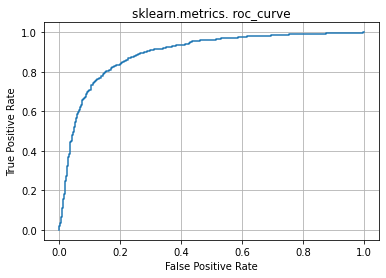

In [ ]:
plt.plot(fpr, tpr)
plt.grid()

plt.title('sklearn.metrics. roc_curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.

In [ ]:
roc_auc_score( y_test, predictions[:, 1] )

0.8926750568010731

Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.

In [ ]:
def get_tfpn(border = 0.5):
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative

    predictions = model.predict_proba( X_test )
    for predicted_prob, actual in zip( predictions[:, 1], y_test ):    
        if predicted_prob >= border:
            predicted = 1
        else:
            predicted = 0
        
        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
        
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    return tp, fp, fn, tn

In [ ]:
tp, fp, fn, tn = get_tfpn()
tp, fp, fn, tn

(999, 198, 189, 786)

In [ ]:
accuracy = (tp + tn) / (tp + fp + fn + tn)
precision = tp / (tp + fp)
TPR = tp / (tp + fn)
FPR = fp / (fp + tn)
print(f'accuracy: {accuracy}\nprecision: {precision}\nTPR: {TPR}\nFPR: {FPR}')

accuracy: 0.8218232044198895
precision: 0.8345864661654135
TPR: 0.8409090909090909
FPR: 0.20121951219512196


Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.

In [ ]:
# подсчитывааем значение метрик TPR, FPR в зависимости от значения "отсечки" border.
TPRS = []
FPRS = []
precisions = []
for i in range(100):
    border = i * 0.01
    tp, fp, fn, tn = get_tfpn(border=border)
    TPR = tp / (tp + fn)
    FPR = fp / (fp + tn)
    precision = tp / (tp + fp + 10**(-10))
    TPRS.append(TPR)
    FPRS.append(FPR)
    precisions.append(precision)

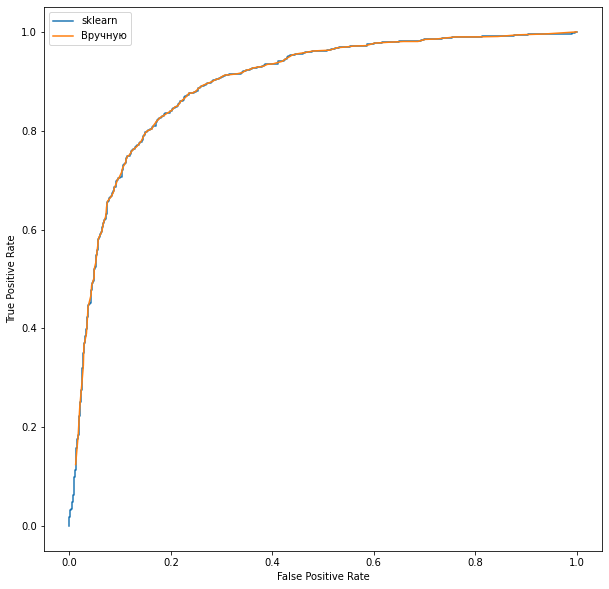

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label='sklearn')
plt.plot(FPRS, TPRS, label='Вручную')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=0)
plt.show()

In [ ]:
from sklearn.metrics import auc
auc(fpr, tpr), auc(FPRS, TPRS)

(0.8926750568010731, 0.8921562337466808)

Оба графика и их площади под кривой примерно совпадают, следовательно метрики подсчитаны корректно.

Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.

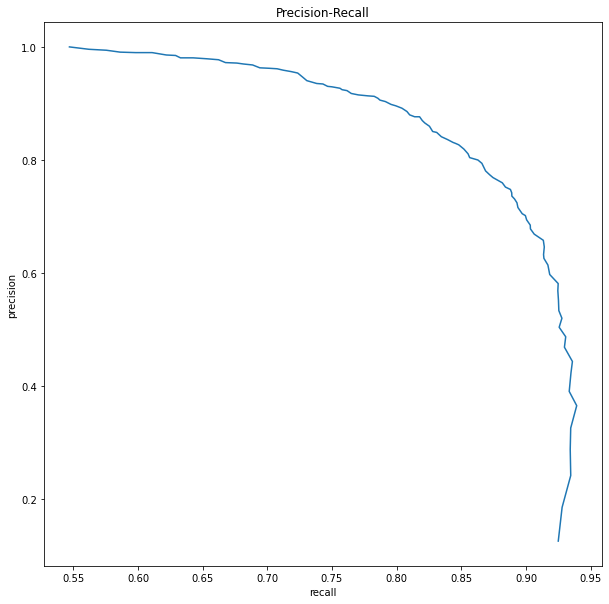

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(precisions, TPRS)
plt.title('Precision-Recall')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()